<a href="https://colab.research.google.com/github/demetere/digit-recognition/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# define hyper parameters
learning_rate = 0.001
epoch_num = 2
batch_size = 128
num_classes = 10


# load datasets
xy_train = torchvision.datasets.MNIST(
    root="drive/MyDrive/AI/datasets/train",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor())


xy_test = torchvision.datasets.MNIST(
    root="drive/MyDrive/AI/datasets/test",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor())

print('size of training data = ', len(xy_train))
print('size of testing data = ', len(xy_test))


size of training data =  60000
size of testing data =  10000


In [3]:
# define loaders
train_loader = DataLoader(dataset=xy_train,batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=xy_test, batch_size=batch_size, shuffle=False)

# define Neural Net
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,
                          stride=1, padding=1)
    self.max_pooling = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc = nn.Linear(in_features=12*14*14,out_features=10)

  def forward(self, x):
    out = F.relu(self.conv(x)) # first convolution layer 
    out = self.max_pooling(out) # pooling
    out = out.view(-1, 12*14*14) # reshape
    out = self.fc(out) # fully connected layer without softmax because it is used in CrossEntropyLoss()
    return out

In [4]:
# initialize model
model = CNN()

# define loss
loss_fn = nn.CrossEntropyLoss()

# define optimizer 
optimizer = torch.optim.Adam(params= model.parameters(), lr = learning_rate)

In [5]:
# define training function
def training(n_epochs, model, optimizer, loss_fn, train_data_loader):
  metadata = {
        'train_loss':[],
        'correct': 0,
        'total': 0
    }
    
  for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(train_data_loader):
      
      # forward propagation
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)
        
      # backward propagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      # fill metadata
      metadata['train_loss'].append(loss.item())
      _, output_classes = torch.max(outputs, dim=1)
      metadata['total'] += labels.shape[0]
      metadata['correct'] += int((output_classes == labels).sum())
        
      if i%100 == 0:
        print(f'Epoch: {epoch}, Iteration: {i}, Loss: {loss}')
  model.eval()
  return metadata

In [6]:
# define testing function
def testing(model, loss_fn, test_data_loader):    
  metadata = {
    'test_loss':[],
    'correct': 0,
    'total': 0
  }
    
  for i, (imgs, labels) in enumerate(test_data_loader):

    # forward propagation
    outputs = model(imgs)
    loss = loss_fn(outputs, labels)
    
    metadata['test_loss'].append(loss)
        
    _, output_classes = torch.max(outputs, dim=1)
    metadata['total'] += labels.shape[0]
    metadata['correct'] += int((output_classes==labels).sum())
        
  return metadata

In [7]:
train_metadata = training(n_epochs=epoch_num,
                          model=model, 
                          optimizer=optimizer, 
                          loss_fn=loss_fn, 
                          train_data_loader=train_loader)
print(f"\nmodel accuracy on training data = {train_metadata['correct']/train_metadata['total']}")

Epoch: 0, Iteration: 0, Loss: 2.320355176925659
Epoch: 0, Iteration: 100, Loss: 0.4142976999282837
Epoch: 0, Iteration: 200, Loss: 0.23700262606143951
Epoch: 0, Iteration: 300, Loss: 0.28865018486976624
Epoch: 0, Iteration: 400, Loss: 0.11691177636384964
Epoch: 1, Iteration: 0, Loss: 0.22036559879779816
Epoch: 1, Iteration: 100, Loss: 0.22551840543746948
Epoch: 1, Iteration: 200, Loss: 0.14057664573192596
Epoch: 1, Iteration: 300, Loss: 0.19816285371780396
Epoch: 1, Iteration: 400, Loss: 0.11809926480054855

model accuracy on training data = 0.920175


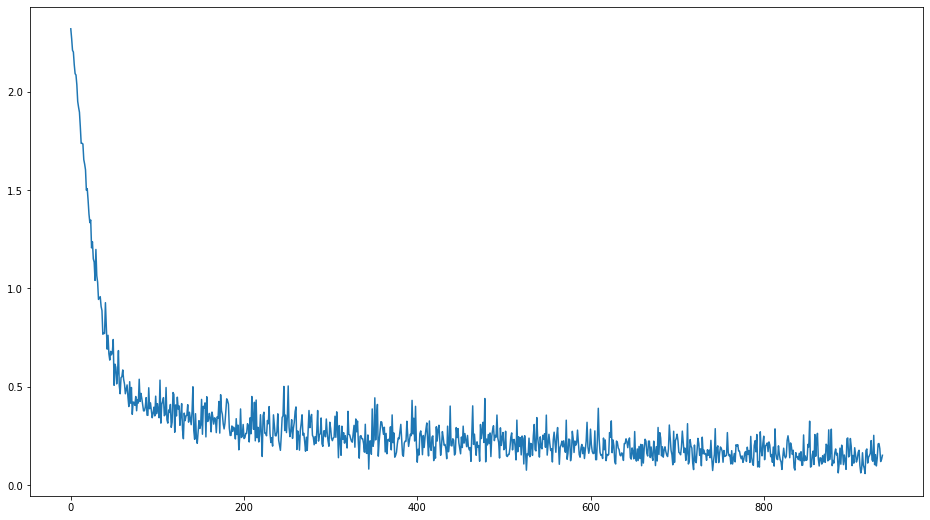

In [8]:
# plot progress
plt.figure(figsize=(16,9))
plt.plot(train_metadata['train_loss'])
plt.show()

In [9]:
# test model
test_metadata = testing(model=model, 
                        loss_fn=loss_fn, 
                        test_data_loader=test_loader)

print(f"\nmodel accuracy on test data= {test_metadata['correct']/test_metadata['total']}")



model accuracy on test data= 0.9607
